In [2]:
import uproot4
import awkward1 as ak
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep

In [ ]:
fileName = "/eos/cms/store/group/phys_pps/dilepton/DoubleMuon/UL-MiniAOD-2017/DoubleMuon_UL2017B.root"

In [20]:
#proton_selection = "SingleRP"
proton_selection = "MultiRP"

In [ ]:
root = uproot4.open( fileName )
tree = root["ggll_miniaod/ntp1"]

#keys = ["Run", "LumiSection", "BX", "EventNum", "CrossingAngle","nHLT", "HLT_Accept", "HLT_Prescl", "HLT_Name",
#        "nMuonCand", "MuonCand_pt", "MuonCand_eta", "MuonCand_phi", "MuonCand_e", "MuonCand_charge", "MuonCand_vtxz", "MuonCand_istight",
#        "nPrimVertexCand", "PrimVertexCand_z", "PrimVertexCand_chi2", "PrimVertexCand_ndof", "PrimVertexCand_tracks",
#        "Weight", "PUWeightTrue"]
#keys.append( "nPfCand" )
#keys.extend( tree.keys( filter_name="PfCand*" ) ) 
#keys.append( "nRecoProtCand" )
#keys.extend( tree.keys( filter_name="ProtCand*" ) )
keys = ["Run", "LumiSection", "BX", "EventNum", "CrossingAngle","nHLT", "HLT_Accept", "HLT_Prescl", "HLT_Name",
        "nMuonCand", "MuonCand_pt", "MuonCand_eta", "MuonCand_phi", "MuonCand_e", "MuonCand_charge", "MuonCand_vtxz", "MuonCand_istight",
        "nPrimVertexCand", "Weight", "PUWeightTrue"]
keys.append( "nRecoProtCand" )
keys.extend( tree.keys( filter_name="ProtCand*" ) )

print ( keys )

events = tree.arrays( keys, library="ak", how="zip", entry_stop=10000 )
#events = tree.arrays( keys, library="ak", how="zip", entry_stop=None )
ak.to_list( events[:10] )

In [ ]:
events = ak.concatenate( [events]*10, axis=0 )

In [ ]:
print ( len(events) )
ak.to_list( events[10000:10010] )

In [ ]:
np.random.seed( 42 )
index_rnd = np.random.permutation( len( events ) )
#arrays_rnd = arrays[ index_rnd ]
print ( len( index_rnd ) )

In [ ]:
protons = events.ProtCand
ak.to_list( protons[:10] )

In [ ]:
ak.num( protons[:10] )

In [ ]:
protons_rnd = protons[ index_rnd ]

In [ ]:
ak.to_list( protons_rnd[:10] )

In [ ]:
ak.num( protons_rnd[:10] )

In [ ]:
events[ "ProtCandRnd" ] = protons_rnd

In [ ]:
ak.to_list( events.ProtCand[:10] )

In [ ]:
ak.to_list( events.ProtCandRnd[:10] )

In [ ]:
ak.num( events.ProtCand[:10] )

In [ ]:
ak.num( events.ProtCandRnd[:10] )

In [ ]:
from select_events import *

maxEvents_ = 500000
#maxEvents_ = None

apply_exclusive_ = False
random_protons_ = True
resample_factor_ = 20
resample_ = False
if resample_factor_ > 1: resample_ = True

np.random.seed( 42 )

columns = ( "Run", "LumiSection", "BX", "EventNum", "CrossingAngle",
            "MultiRP", "Arm", "RPId1", "RPId2", "TrackX1", "TrackY1", "TrackX2", "TrackY2",
            "Xi", "T", "ThX", "ThY", "Time",
            "TrackThX_SingleRP", "TrackThY_SingleRP",
            "Track1ThX_MultiRP", "Track1ThY_MultiRP", "Track2ThX_MultiRP", "Track2ThY_MultiRP",
            "Muon0Pt", "Muon0Eta", "Muon0Phi", "Muon0VtxZ", "Muon1Pt", "Muon1Eta", "Muon1Phi", "Muon1VtxZ",
            "PrimVertexZ", "InvMass", "ExtraPfCands", "Acopl", "XiMuMuPlus", "XiMuMuMinus" )
protons_keys = {}
for col_ in columns:
    protons_keys[ col_ ] = col_
protons_keys[ "MultiRP" ] = "ismultirp"
protons_keys[ "Arm" ] = "arm"
protons_keys[ "RPId1" ] = "rpid1"
protons_keys[ "RPId2" ] = "rpid2"
protons_keys[ "TrackX1" ] = "trackx1"
protons_keys[ "TrackY1" ] = "tracky1"
protons_keys[ "TrackX2" ] = "trackx2"
protons_keys[ "TrackY2" ] = "tracky2"
protons_keys[ "Xi" ] = "xi"
protons_keys[ "T" ] = "t"
protons_keys[ "Time" ] = "time"
protons_keys[ "TrackThX_SingleRP" ] = "trackthx_single"
protons_keys[ "TrackThY_SingleRP" ] = "trackthy_single"
protons_keys[ "Track1ThX_MultiRP" ] = "trackthx_multi1"
protons_keys[ "Track1ThY_MultiRP" ] = "trackthy_multi1"
protons_keys[ "Track2ThX_MultiRP" ] = "trackthx_multi2"
protons_keys[ "Track2ThY_MultiRP" ] = "trackthy_multi2"
protons_keys[ "ExtraPfCands" ] = "nExtraPfCandPV3"

protons_list = {}
for col_ in columns:
    protons_list[ col_ ] = []

selections = None
counts = None

counts_label_protons_ = "Protons" if not random_protons_ else "ProtonsRnd"

root_ = uproot4.open( fileName )
tree_ = root_["ggll_miniaod/ntp1"]

keys = ["Run", "LumiSection", "BX", "EventNum", "CrossingAngle","nHLT", "HLT_Accept", "HLT_Prescl", "HLT_Name",
        "nMuonCand", "MuonCand_pt", "MuonCand_eta", "MuonCand_phi", "MuonCand_e", "MuonCand_charge", "MuonCand_vtxz", "MuonCand_istight",
        "nPrimVertexCand", "PrimVertexCand_z", "PrimVertexCand_chi2", "PrimVertexCand_ndof", "PrimVertexCand_tracks",
        "Weight", "PUWeightTrue"]
keys.append( "nPfCand" )
keys.extend( tree_.keys( filter_name="PfCand*" ) ) 
keys.append( "nRecoProtCand" )
keys.extend( tree_.keys( filter_name="ProtCand*" ) )
print ( keys )

for events_ in tree_.iterate( keys , library="ak", how="zip", step_size="100 MB", entry_stop=maxEvents_ ):

    events_sel_, selections_, counts_ = select_events( events_, apply_exclusive=apply_exclusive_ )
    
    # Repeat events by resample factor
    if resample_:
        counts_ = counts_ * resample_factor_
        
    if selections is None:
        selections = selections_
        counts = counts_
    else:
        msk_selections = np.full_like( selections, False, dtype='bool' )
        for key in selections_:
            #print ( key )
            #print ( selections == key )
            msk_selections |= ( selections == key )
        counts[ msk_selections ] += counts_

    # Repeat events by resample factor
    if resample_:
        events_sel_ = ak.concatenate( ( [events_sel_] * resample_factor_ ), axis=0 )
        
    # Randomize proton arrays
    if random_protons_:
        protons_sel_ = events_sel_.ProtCand
    
        index_rnd_ = np.random.permutation( len( events_sel_ ) )
    
        protons_rnd_ = protons_sel_[ index_rnd_ ]
    
        events_sel_[ "ProtCandRnd" ] = protons_rnd_    

        print ( ak.num( events_sel_.ProtCand ) )
        print ( ak.num( events_sel_.ProtCandRnd ) )    
        
    protons_ = None
    if not random_protons_: protons_ = select_protons( events_sel_, "ProtCand" )
    else:                   protons_ = select_protons( events_sel_, "ProtCandRnd" )    
        
    counts_protons_ = len( protons_ )
    if not counts_label_protons_ in selections:
        selections = np.concatenate( ( selections, np.array( [ counts_label_protons_ ] ) ) )
        counts = np.concatenate( ( counts, np.array( [counts_protons_] ) ) )
    else:    
        counts[ selections == counts_label_protons_ ] += counts_protons_ 
    print ( selections )
    print ( counts )
    
    protons_flatten_ = {}
    for col_ in columns:
        protons_list[ col_ ].append( ak.flatten( protons_[ protons_keys[ col_ ] ] ) )
        
    #print ( "Protons (flattened): {}".format( len( protons_list[ "Xi" ][-1] ) ) )
        
#print ( selections )
#print ( counts )
root_.close()


In [ ]:
protons_flatten_all = {}
for col_ in columns:
    protons_flatten_all[ col_ ] = np.array( np.concatenate( protons_list[ col_ ] ) )
    
print ( "Protons (flattened): {}".format( len( protons_flatten_all["Xi"] ) ) )

In [ ]:
data_ = np.stack( list( protons_flatten_all.values() ), axis=1 )
print ( data_ )
print ( data_.shape )

columns_ = np.array( columns, dtype='S' )
print ( columns_ )

event_counts_ = counts
print ( event_counts_ )
selections_ = np.array( selections, dtype='S' )
print ( selections_ )

In [ ]:
with h5py.File( 'output-test-mixing.h5', 'w') as f:
    dset = f.create_dataset( 'protons', data=data_ )
    dset_columns = f.create_dataset( 'columns', data=columns_ )
    dset_counts = f.create_dataset( 'event_counts', data=event_counts_ )
    dset_selections = f.create_dataset( 'selections', data=selections_ )

    print ( dset )
    print ( dset[-1] )
    print ( dset_columns )
    print ( list( dset_columns ) )
    print ( dset_counts )
    print ( list( dset_counts ) )
    print ( dset_selections )
    print ( list( dset_selections ) )
    

In [15]:
df = None
#with h5py.File('output-test-mixing.h5', 'r') as f:
with h5py.File('output/output-UL2017B-PreSel-Rnd-Res20.h5', 'r') as f:    
    print ( list( f.keys() ) )
    dset = f['protons']
    print ( dset.shape )
    print ( dset[:,:] )
    dset_columns = f['columns']
    print ( dset_columns.shape )
    columns_ = list( dset_columns )
    print ( columns_ )
    columns_str = [ item.decode("utf-8") for item in columns_ ]
    print ( columns_str )
    dset_counts = f['event_counts']
    event_counts_ = list( dset_counts )
    print ( event_counts_ )
    dset_selections = f['selections']
    selections_ = list( dset_selections )
    print ( selections_ )
    selections_str = [ item.decode("utf-8") for item in selections_ ]
    print ( selections_str )

    df = pd.DataFrame( dset, columns=columns_str )
    print ( df )


['columns', 'event_counts', 'protons', 'selections']
(2141500, 38)
[[2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 [2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 [2.97227000e+05 5.30000000e+01 2.75900000e+03 ... 5.92592856e-01
  1.09871883e-02 1.22591492e-02]
 ...
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]
 [2.99062000e+05 1.33000000e+02 1.72100000e+03 ... 6.64818845e-01
  3.52177158e-03 7.56784159e-02]]
(38,)
[b'Run', b'LumiSection', b'BX', b'EventNum', b'CrossingAngle', b'MultiRP', b'Arm', b'RPId1', b'RPId2', b'TrackX1', b'TrackY1', b'TrackX2', b'TrackY2', b'Xi', b'T', b'ThX', b'ThY', b'Time', b'TrackThX_SingleRP', b'TrackThY_SingleRP', b'Track1ThX_MultiRP', b'Track1ThY_MultiRP', b'Track2ThX_MultiRP', b'Track2ThY_MultiRP', b'Muon

In [16]:
#df = df[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
#          'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
#          'Xi', 'T', 'ThX', 'ThY', 'Time',
#          'TrackThX_SingleRP', 'TrackThY_SingleRP',
#          'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',          
#          'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32", "ExtraPfCands": "int32" } )
df = df[ ['Run', 'LumiSection', 'EventNum', 'CrossingAngle', 
          'MultiRP', 'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
          'Xi', 'T', 'ThX', 'ThY', 'Time',
          'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus', 'XiMuMuMinus'] ].astype( { "Run": "int64", "LumiSection": "int64", "EventNum": "int64", "MultiRP": "int32", "Arm": "int32", "RPId1": "int32", "RPId2": "int32", "ExtraPfCands": "int32" } )
df[:20]

,Run,LumiSection,EventNum,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,...,Xi,T,ThX,ThY,Time,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus
0,297227,53,36430301,120.0,0,-999,23,-1,9.954590,1.930664,...,0.095958,-0.097366,0.000000,-0.000048,0.0,91.897397,26,0.592593,0.010987,0.012259
1,297227,53,36430301,120.0,0,-999,23,-1,10.817871,3.526855,...,0.103006,-0.249191,0.000000,-0.000079,0.0,91.897397,26,0.592593,0.010987,0.012259
2,297227,53,36430301,120.0,0,-999,103,-1,5.083252,0.758118,...,0.075516,-0.038826,0.000000,-0.000029,0.0,91.897397,26,0.592593,0.010987,0.012259
3,297227,53,36430301,120.0,0,-999,123,-1,5.223572,0.882141,...,0.078583,-0.038955,0.000000,-0.000029,0.0,91.897397,26,0.592593,0.010987,0.012259
4,297227,53,36430301,120.0,1,1,103,123,5.083252,0.758118,...,0.057598,-0.383160,0.000091,-0.000035,0.0,91.897397,26,0.592593,0.010987,0.012259
5,297227,53,36577201,120.0,0,-999,3,-1,5.887939,-1.379761,...,0.058167,-0.281994,0.000000,0.000084,0.0,12.129827,48,0.983012,0.056195,0.004091
6,297227,53,36577201,120.0,0,-999,23,-1,4.089600,0.040321,...,0.041184,-0.002246,0.000000,-0.000004,0.0,12.129827,48,0.983012,0.056195,0.004091
7,297227,53,36577201,120.0,0,-999,23,-1,5.682251,-1.620361,...,0.055893,-0.347741,0.000000,0.000093,0.0,12.129827,48,0.983012,0.056195,0.004091
8,297227,53,36577201,120.0,1,0,3,23,5.887939,-1.379761,...,0.077986,-0.813752,-0.000107,0.000097,0.0,12.129827,48,0.983012,0.056195,0.004091
9,297227,55,38079658,120.0,0,-999,3,-1,3.419312,0.312195,...,0.036575,-0.125956,0.000000,-0.000055,0.0,123.616515,27,0.132612,0.001953,0.048346


Proton selection: MultiRP
Number of protons: 234, 221


Text(0, 0.5, '$\\xi_{\\mu\\mu}$')

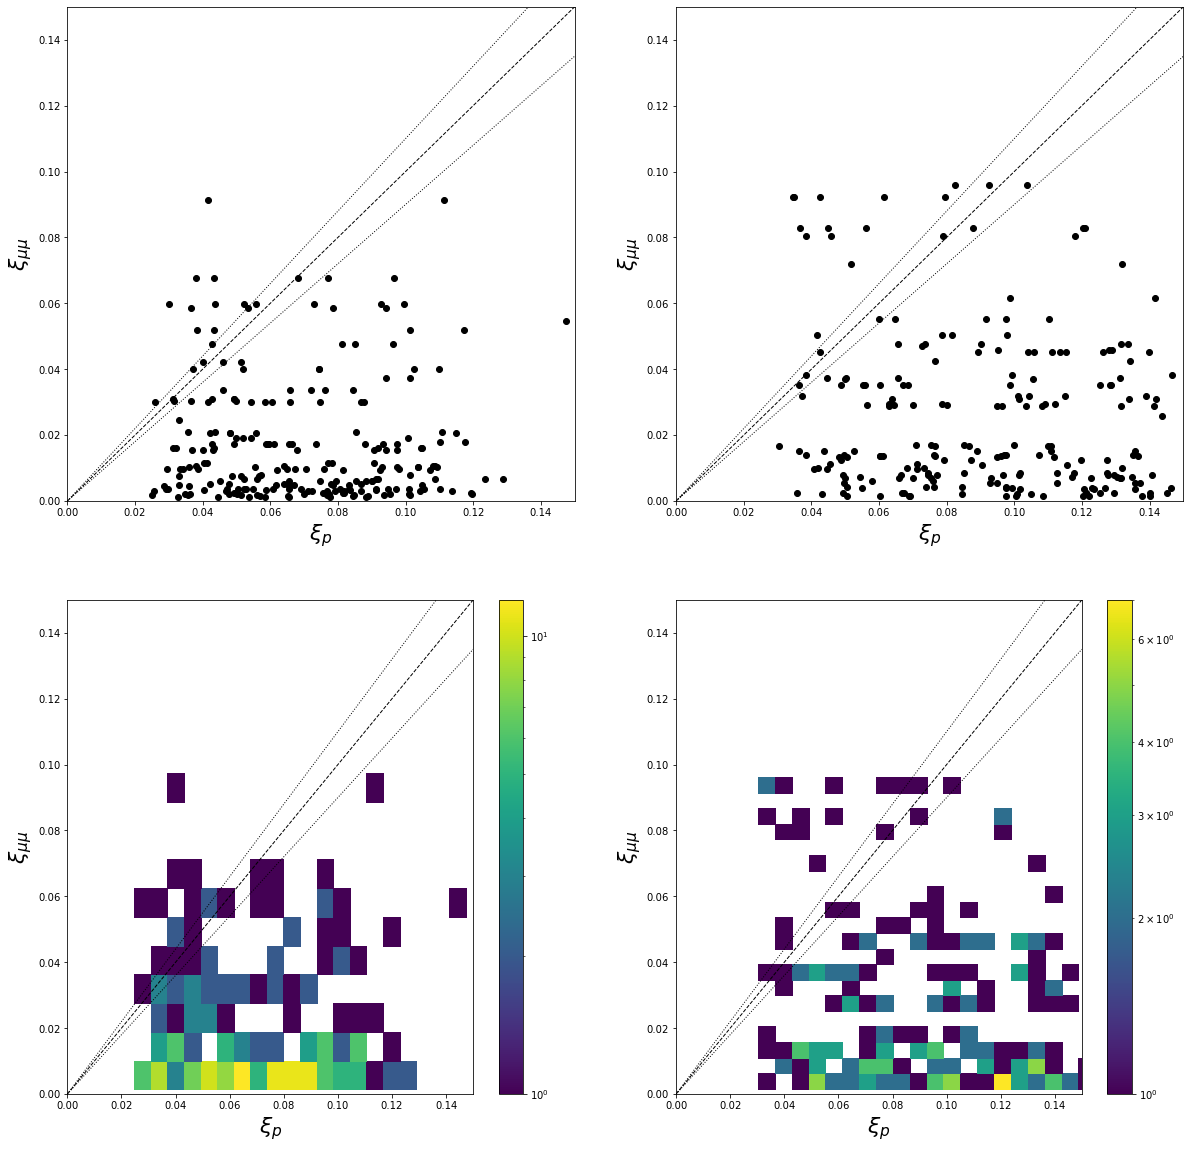

In [21]:
from matplotlib.colors import LogNorm

msk_excl = ( df["InvMass"] >= 110. ) & ( df["Acopl"] <= 0.009 ) & ( df["ExtraPfCands"] <= 1 )

msk_protons_1 = None
msk_protons_2 = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk_protons_1 = msk_excl & ( df["MultiRP"] == 0) & ( df["RPId1"] == 23 )
    msk_protons_2 = msk_excl & ( df["MultiRP"] == 0) & ( df["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk_protons_1 = msk_excl & ( df["MultiRP"] == 1 ) & ( df["Arm"] == 0 )
    msk_protons_2 = msk_excl & ( df["MultiRP"] == 1 ) & ( df["Arm"] == 1 )

print ( "Proton selection: {}".format( proton_selection ) )
print ( "Number of protons: {}, {}".format( len( df[ "Xi" ][ msk_protons_1 ] ), len( df[ "Xi" ][ msk_protons_2 ] ) ) )

fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
axes[0,0].plot( df[ "Xi" ][ msk_protons_1 ], df[ "XiMuMuPlus" ][ msk_protons_1 ], 'ko' )
axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,0].set_xlim(0.,0.15)
axes[0,0].set_ylim(0.,0.15)
axes[0,0].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[0,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
#axes[0,0].set_xlabel( r"$\xi_p$", fontsize=22, ha='right', x=1.0 )
#axes[0,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22, ha='right', y=1.0 )
axes[0,1].plot( df[ "Xi" ][ msk_protons_2 ], df[ "XiMuMuMinus" ][ msk_protons_2 ], 'ko' )
axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[0,1].set_xlim(0.,0.15)
axes[0,1].set_ylim(0.,0.15)
axes[0,1].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[0,1].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
counts, xedges, yedges, im = axes[1,0].hist2d( df[ "Xi" ][ msk_protons_1 ], df[ "XiMuMuPlus" ][ msk_protons_1 ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,0])
axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,0].set_xlim(0.,0.15)
axes[1,0].set_ylim(0.,0.15)
axes[1,0].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[1,0].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )
counts, xedges, yedges, im = axes[1,1].hist2d( df[ "Xi" ][ msk_protons_2 ], df[ "XiMuMuMinus" ][ msk_protons_2 ], bins=(20,20), norm=LogNorm(), cmap='viridis' )
fig.colorbar(im, ax=axes[1,1])
axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
axes[1,1].set_xlim(0.,0.15)
axes[1,1].set_ylim(0.,0.15)
axes[1,1].set_xlabel( r"$\xi_p$", fontsize=22 )
axes[1,1].set_ylabel( r"$\xi_{\mu\mu}$", fontsize=22 )

(array([0.2 , 0.15, 0.45, 0.35, 0.75, 0.55, 0.75, 0.85, 0.8 , 0.8 , 0.4 ,
        0.  , 0.  , 0.  , 0.  ]),
 array([-5.        , -4.46666667, -3.93333333, -3.4       , -2.86666667,
        -2.33333333, -1.8       , -1.26666667, -0.73333333, -0.2       ,
         0.33333333,  0.86666667,  1.4       ,  1.93333333,  2.46666667,
         3.        ]),
 <a list of 15 Patch objects>)

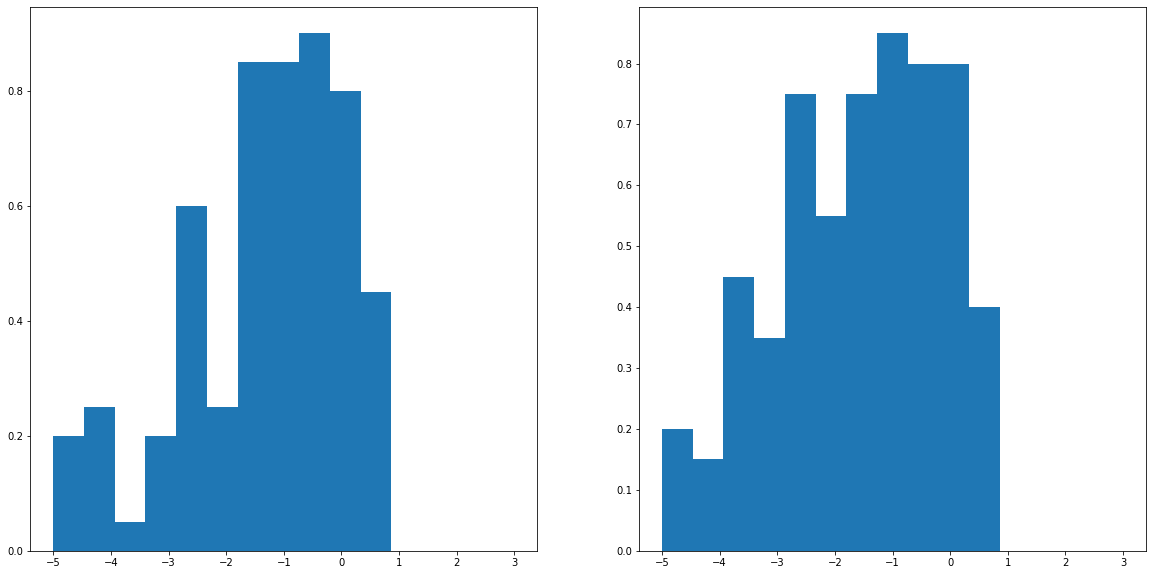

In [22]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

resample_factor = 20
weights_1 = None
if resample_factor > 1:
    weights_1 = np.full_like( df[ "Xi" ][ msk_protons_1 ], ( 1./resample_factor ) )
vals_1 = 1. - df[ "Xi" ][ msk_protons_1 ] / df[ "XiMuMuPlus" ][ msk_protons_1 ]
axes[0].hist( vals_1, bins=15, range=(-5.,3.), weights=weights_1 )

weights_2 = None
if resample_factor > 1:
    weights_2 = np.full_like( df[ "Xi" ][ msk_protons_2 ], ( 1./resample_factor ) )
vals_2 = 1. - df[ "Xi" ][ msk_protons_2 ] / df[ "XiMuMuMinus" ][ msk_protons_2 ]
axes[1].hist( vals_2, bins=15, range=(-5.,3.), weights=weights_2 )